In [1]:
import networkx as nx
from utility_funcs import readfeatures, readfeaturelist, readcirclefile, read_nodeadjlist, generate_class_matrix, generate_feature_matrix, convert_profile_dict_to_vector
import os
from sklearn.ensemble import RandomForestClassifier
from pathlib import Path
from node2vec import Node2Vec
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



root_dir = Path.cwd().resolve()
data_dir = root_dir / 'data'

e:\School\Grad\learning-social-circles\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
features = readfeaturelist(data_dir / 'featureList.txt')
print( features)
print(len(features))

['birthday', 'education;classes;description', 'education;classes;from;id', 'education;classes;from;name', 'education;classes;id', 'education;classes;name', 'education;classes;with;id', 'education;classes;with;name', 'education;concentration;id', 'education;concentration;name', 'education;degree;id', 'education;degree;name', 'education;school;id', 'education;school;name', 'education;type', 'education;with;id', 'education;with;name', 'education;year;id', 'education;year;name', 'first_name', 'gender', 'hometown;id', 'hometown;name', 'id', 'languages;id', 'languages;name', 'last_name', 'locale', 'location', 'location;id', 'location;name', 'middle_name', 'name', 'political', 'religion', 'work;description', 'work;employer;id', 'work;employer;name', 'work;end_date', 'work;from;id', 'work;from;name', 'work;location;id', 'work;location;name', 'work;position;id', 'work;position;name', 'work;projects;description', 'work;projects;end_date', 'work;projects;from;id', 'work;projects;from;name', 'work

In [3]:
profiles_dict = readfeatures(data_dir / 'features.txt')

profile_matrix = [convert_profile_dict_to_vector(profile,features) for profile in profiles_dict]

Total friends: 265
Training Ego: 345 Circle: 28 ...


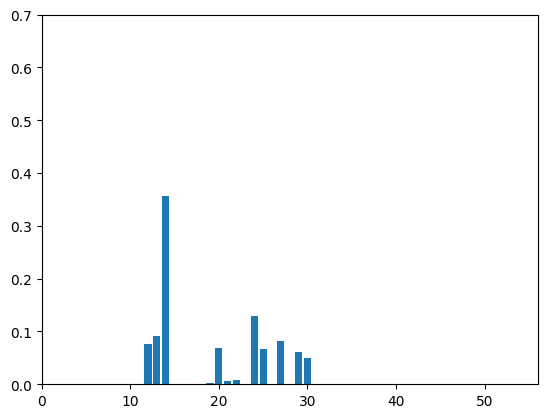

Training Ego: 345 Circle: 29 ...


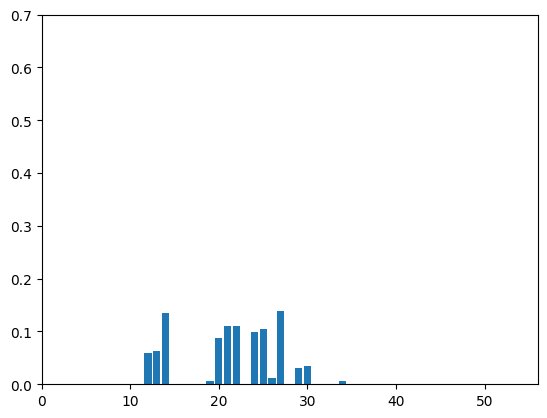

Training Ego: 345 Circle: 22 ...


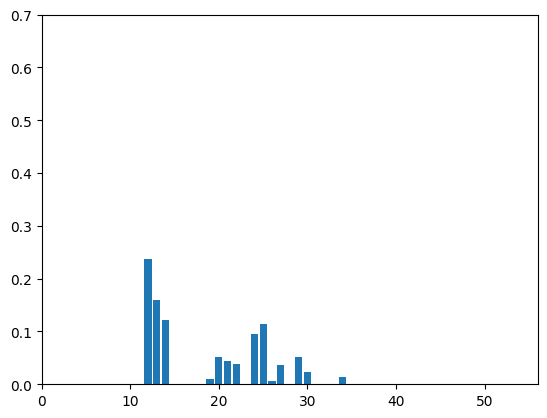

Training Ego: 345 Circle: 20 ...


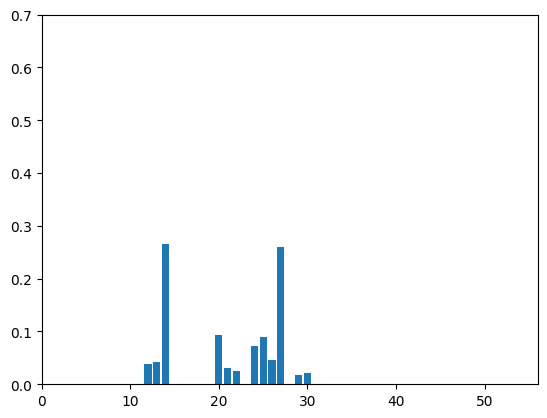

Training Ego: 345 Circle: 26 ...


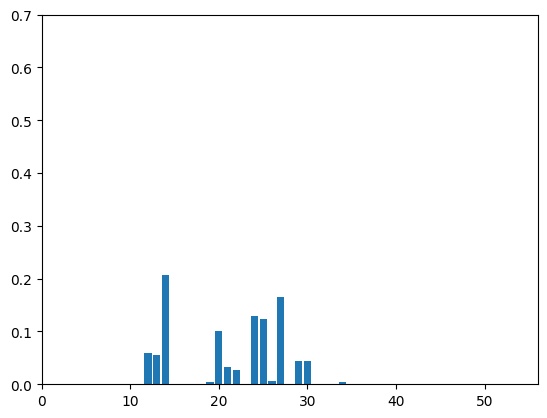

Training Ego: 345 Circle: 27 ...


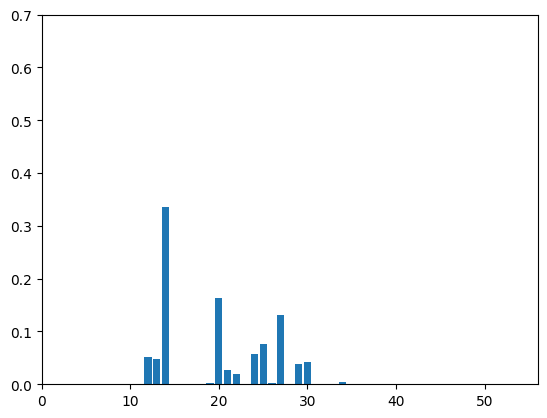

Training Ego: 345 Circle: 24 ...


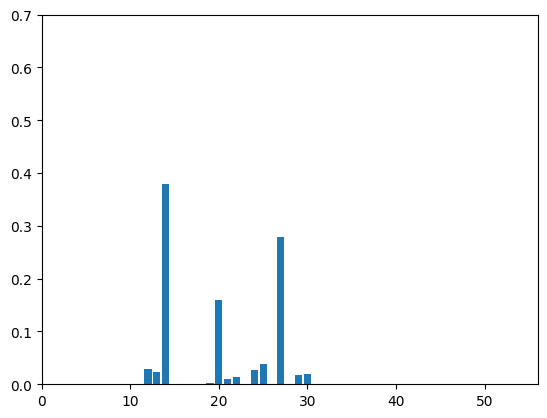

In [4]:
ego = 345
true_circles = readcirclefile(data_dir / 'Training' / f"{str(ego)}.circles")
G = read_nodeadjlist(data_dir / 'egonets' / f"{str(ego)}.egonet")
print('Total friends:', len(G.nodes()))
class_matrix = generate_class_matrix(G,true_circles)
feature_matrix = generate_feature_matrix(profile_matrix,ego,G)

for label,circle in class_matrix.items():
    print('Training Ego:', ego,'Circle:',label,'...')
    forest = RandomForestClassifier(n_estimators=100)
    forest = forest.fit( feature_matrix, circle )
    important_features = sorted(zip(features,forest.feature_importances_), key=lambda x: x[1], reverse=True)
    importance_scores = [val for key,val in important_features]
    importance_labels = [key for key,val in important_features]
    ind = range(len(importance_scores))
    plt.bar(ind, forest.feature_importances_)
    plt.axis([min(ind), max(ind), 0, 0.7])
    plt.show()

In [5]:
dict(zip(true_circles.keys(),[[int(g in circle) for g in G.nodes()] for circle in true_circles.values()]))


{28: [0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
 

Total friends: 265
Training Ego: 345 Circle: 28 ...


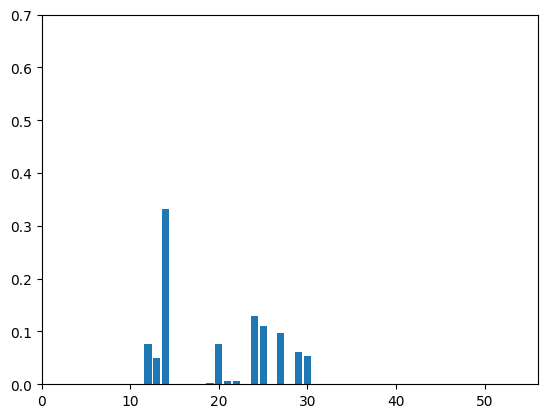

Training Ego: 345 Circle: 29 ...


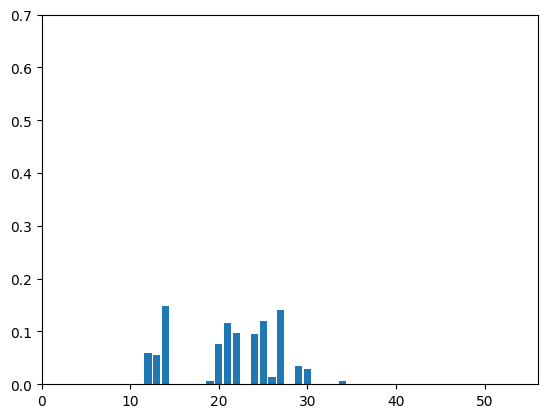

Training Ego: 345 Circle: 22 ...


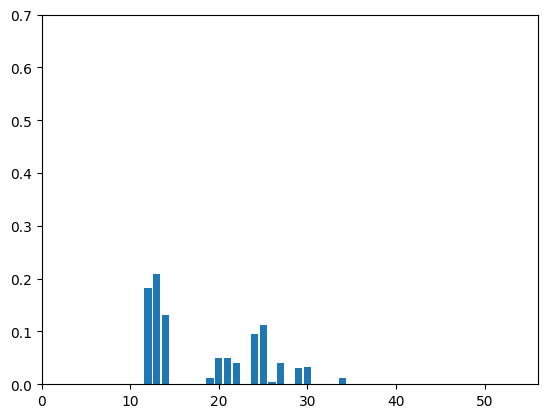

Training Ego: 345 Circle: 20 ...


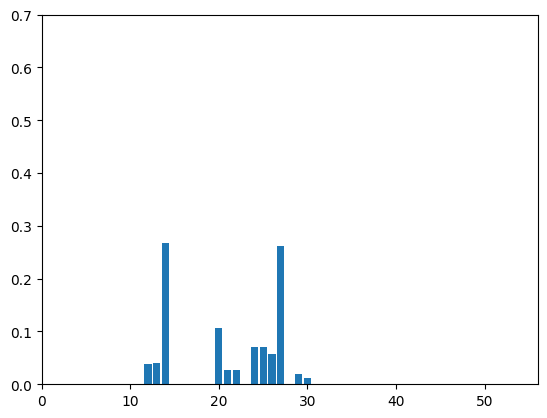

Training Ego: 345 Circle: 26 ...


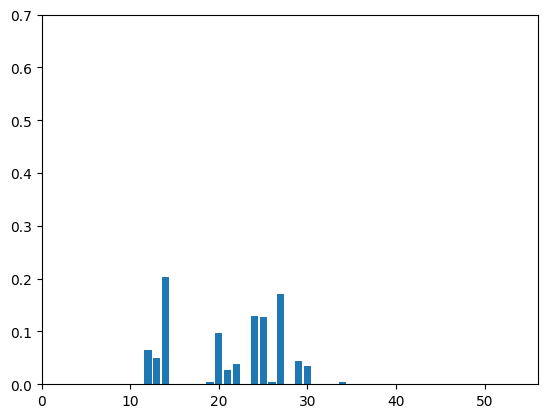

Training Ego: 345 Circle: 27 ...


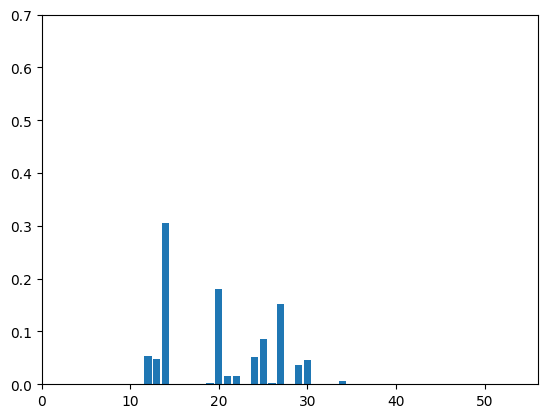

Training Ego: 345 Circle: 24 ...


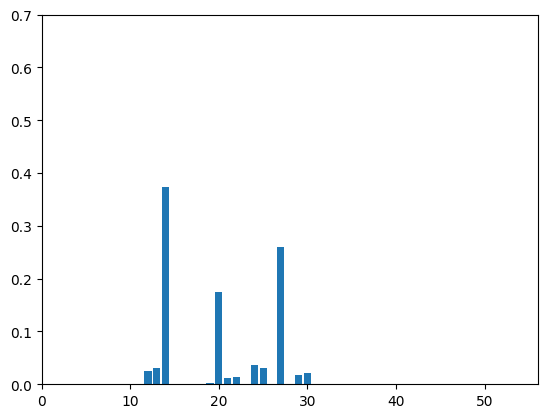

In [8]:
true_circles = readcirclefile(data_dir / 'Training' / f"{str(ego)}.circles")
G = read_nodeadjlist(data_dir / 'egonets' / f"{str(ego)}.egonet")
print('Total friends:', len(G.nodes()))
class_matrix = generate_class_matrix(G,true_circles)
feature_matrix = generate_feature_matrix(profile_matrix,ego,G)

for label,circle in class_matrix.items():
    print('Training Ego:', ego,'Circle:',label,'...')
    forest = RandomForestClassifier(n_estimators=100)
    forest = forest.fit( feature_matrix, circle )
    important_features = sorted(zip(features,forest.feature_importances_), key=lambda x: x[1], reverse=True)
    importance_scores = [val for key,val in important_features]
    importance_labels = [key for key,val in important_features]
    ind = range(len(importance_scores))
    plt.bar(ind, forest.feature_importances_)
    plt.axis([min(ind), max(ind), 0, 0.7])
    plt.show()

In [10]:
trainingfiles = os.listdir(data_dir / 'Training')

df_labels = ['Ego','Circle']+features
characteristic_profiles = []

for item in trainingfiles:
    ego = int((item.split('.')[0]))
    true_circles = readcirclefile(data_dir / 'Training'/ item)
    G = read_nodeadjlist(data_dir / 'egonets' / f"{str(ego)}.egonet")
    class_matrix = generate_class_matrix(G,true_circles)
    feature_matrix = generate_feature_matrix(profile_matrix,ego,G)
    
    for label,circle in class_matrix.items():
        forest = RandomForestClassifier(n_estimators=100)
        forest = forest.fit( feature_matrix, circle )
        characteristic_profiles.append([ego]+[label]+list(forest.feature_importances_))

df = pd.DataFrame(data=characteristic_profiles,columns=df_labels)

In [11]:
df

,Ego,Circle,birthday,education;classes;description,education;classes;from;id,education;classes;from;name,education;classes;id,education;classes;name,education;classes;with;id,education;classes;with;name,...,work;projects;from;id,work;projects;from;name,work;projects;id,work;projects;name,work;projects;start_date,work;projects;with;id,work;projects;with;name,work;start_date,work;with;id,work;with;name
0,10395,827,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028113,0.0,0.0
1,10395,377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000983,0.0,0.0
2,10395,828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005929,0.0,0.0
3,10395,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008464,0.0,0.0
4,10395,84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022819,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,9947,190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
588,9947,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
589,9947,74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
590,9947,823,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [12]:
df.mean().sort_values() 

work;with;name                       0.000000
work;projects;id                     0.000000
work;projects;from;name              0.000000
education;classes;description        0.000000
work;projects;from;id                0.000000
work;projects;description            0.000000
work;from;name                       0.000000
work;from;id                         0.000000
work;description                     0.000000
middle_name                          0.000000
location                             0.000000
work;with;id                         0.000000
work;projects;name                   0.000000
id                                   0.000000
work;projects;with;id                0.000000
work;projects;with;name              0.000000
work;projects;start_date             0.000163
name                                 0.000213
political                            0.000234
education;with;name                  0.000242
work;projects;end_date               0.000258
education;with;id                 

In [13]:
df.to_csv(data_dir / 'characterist_profiles.csv')

In [14]:
df_pos = df[df.min(axis=1)>=0]
df_neg = df[df.min(axis=1)<0]

In [15]:
df_pos_mean = df_pos.mean()
df_pos_mean.sort_values(ascending=False)
rand_chance = (len(df_pos_mean)-2)
df_pos_mean[df_pos_mean.gt(1./(rand_chance))]*rand_chance

Ego                      695636.665541
Circle                    34590.719595
education;school;id           3.005256
education;school;name         3.294520
education;type               10.502411
education;year;id             1.889486
education;year;name           1.899595
gender                        9.912777
hometown;id                   1.563226
hometown;name                 1.549785
last_name                     1.934473
locale                        7.670294
location;id                   1.783811
location;name                 1.758363
work;employer;id              1.065943
work;employer;name            1.489468
work;start_date               1.650596
dtype: float64

In [16]:
df_pos_mean*rand_chance

Ego                              695636.665541
Circle                            34590.719595
birthday                              0.036274
education;classes;description         0.000000
education;classes;from;id             0.024299
education;classes;from;name           0.028812
education;classes;id                  0.072779
education;classes;name                0.071595
education;classes;with;id             0.037016
education;classes;with;name           0.039934
education;concentration;id            0.573548
education;concentration;name          0.624642
education;degree;id                   0.152966
education;degree;name                 0.141968
education;school;id                   3.005256
education;school;name                 3.294520
education;type                       10.502411
education;with;id                     0.014954
education;with;name                   0.013789
education;year;id                     1.889486
education;year;name                   1.899595
first_name   

In [17]:
df_pos.mean()[2:]

birthday                         0.000636
education;classes;description    0.000000
education;classes;from;id        0.000426
education;classes;from;name      0.000505
education;classes;id             0.001277
education;classes;name           0.001256
education;classes;with;id        0.000649
education;classes;with;name      0.000701
education;concentration;id       0.010062
education;concentration;name     0.010959
education;degree;id              0.002684
education;degree;name            0.002491
education;school;id              0.052724
education;school;name            0.057799
education;type                   0.184253
education;with;id                0.000262
education;with;name              0.000242
education;year;id                0.033149
education;year;name              0.033326
first_name                       0.010184
gender                           0.173908
hometown;id                      0.027425
hometown;name                    0.027189
id                               0